# LSTM(Long Short Term Memroy)
### 기존의 순환신경망에 LSTM 층을 하나 더 생성해 주면 됨

**- 데이터 준비**

In [9]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow import keras
(x_train_imdb, y_train_imdb), (x_target_imdb, y_target_imdb) = imdb.load_data(num_words=500)

from sklearn.model_selection import train_test_split
x_train, x_target, y_train, y_target = train_test_split(x_train_imdb, y_train_imdb, test_size=0.2, random_state=42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(x_train, maxlen=100)
x_target_seq = pad_sequences(x_target, maxlen=100)

In [13]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
# 빈도수가 높은 토큰의 개수 = 500개로 한정,   Embedding vector의 크기(하이퍼 파라미터),   input_length = 토큰의 개수

model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpointCB = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
earlystoppingCB = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=20, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpointCB, earlystoppingCB])

# validation_data=() 튜플 형태를 권장
# (단, 리스트 형태를 주어도 실행은 됨)


Epoch 1/20
313/313 [==============================] - 23s 59ms/step - loss: 0.6924 - accuracy: 0.5340 - val_loss: 0.6917 - val_accuracy: 0.5670
Epoch 2/20
313/313 [==============================] - 16s 53ms/step - loss: 0.6898 - accuracy: 0.6033 - val_loss: 0.6881 - val_accuracy: 0.6238
Epoch 3/20
313/313 [==============================] - 16s 52ms/step - loss: 0.6830 - accuracy: 0.6429 - val_loss: 0.6776 - val_accuracy: 0.6536
Epoch 4/20
313/313 [==============================] - 17s 53ms/step - loss: 0.6497 - accuracy: 0.6467 - val_loss: 0.6149 - val_accuracy: 0.6906
Epoch 5/20
313/313 [==============================] - 15s 48ms/step - loss: 0.5871 - accuracy: 0.7377 - val_loss: 0.5761 - val_accuracy: 0.7518
Epoch 6/20
313/313 [==============================] - 15s 47ms/step - loss: 0.5589 - accuracy: 0.7580 - val_loss: 0.5533 - val_accuracy: 0.7624
Epoch 7/20
313/313 [==============================] - 16s 50ms/step - loss: 0.5385 - accuracy: 0.7666 - val_loss: 0.5354 - val_accuracy:

C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarni

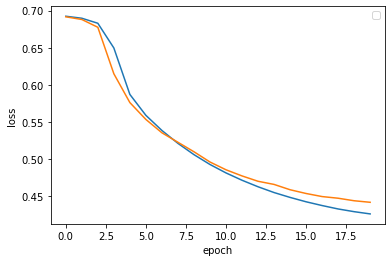

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'target')
plt.show()

**위 과정은 지난 시간과 동일**

**단지 알고리즘만 LSTM으로 바뀐 것**

RNN은 이전 정보를 가지고 새로운 결과를 예측한다면,

LSTM는 일종의 수식을 전달해주어 결과를 가지고 새롭게 예측함

In [15]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3)) # <-- drouout 값
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpointCB = keras.callbacks.ModelCheckpoint('best-lstm-dropout-model.h5', save_best_only=True)
earlystoppingCB = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=50, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpointCB, earlystoppingCB])

Epoch 1/50
313/313 [==============================] - 19s 49ms/step - loss: 0.6925 - accuracy: 0.5300 - val_loss: 0.6915 - val_accuracy: 0.5778
Epoch 2/50
313/313 [==============================] - 15s 48ms/step - loss: 0.6895 - accuracy: 0.6031 - val_loss: 0.6866 - val_accuracy: 0.6252
Epoch 3/50
313/313 [==============================] - 15s 49ms/step - loss: 0.6721 - accuracy: 0.6342 - val_loss: 0.6443 - val_accuracy: 0.6912
Epoch 4/50
313/313 [==============================] - 15s 47ms/step - loss: 0.6203 - accuracy: 0.7157 - val_loss: 0.6107 - val_accuracy: 0.7308
Epoch 5/50
313/313 [==============================] - 14s 46ms/step - loss: 0.5960 - accuracy: 0.7339 - val_loss: 0.5877 - val_accuracy: 0.7422
Epoch 6/50
313/313 [==============================] - 14s 46ms/step - loss: 0.5756 - accuracy: 0.7484 - val_loss: 0.5657 - val_accuracy: 0.7582
Epoch 7/50
313/313 [==============================] - 14s 46ms/step - loss: 0.5531 - accuracy: 0.7606 - val_loss: 0.5435 - val_accuracy:

C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train', 'target')
C:\Users\pc\AppData\Local\Temp/ipykernel_19584/1644147293.py:6: UserWarni

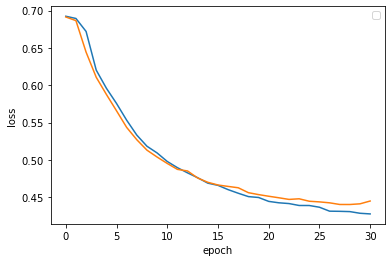

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'target')
plt.show()

In [31]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # --> 층을 연결할 때 변환 과정을 확인하기 위한 매개변수
                                                                    #     (모든 타입스텝의 은닉 상태를 확인, 단 실제 출력은 X)
model.add(keras.layers.LSTM(8, dropout=0.3)) # 은닉층
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpointCB = keras.callbacks.ModelCheckpoint('best-lstm-dropout2-model.h5', save_best_only=True)
earlystoppingCB = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=50, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpointCB, earlystoppingCB])

Epoch 1/50
313/313 [==============================] - 45s 97ms/step - loss: 0.6930 - accuracy: 0.5153 - val_loss: 0.6927 - val_accuracy: 0.5546
Epoch 2/50
313/313 [==============================] - 28s 90ms/step - loss: 0.6921 - accuracy: 0.5749 - val_loss: 0.6913 - val_accuracy: 0.6086
Epoch 3/50
313/313 [==============================] - 28s 89ms/step - loss: 0.6890 - accuracy: 0.6229 - val_loss: 0.6855 - val_accuracy: 0.6538
Epoch 4/50
313/313 [==============================] - 28s 89ms/step - loss: 0.6771 - accuracy: 0.6546 - val_loss: 0.6607 - val_accuracy: 0.6728
Epoch 5/50
313/313 [==============================] - 28s 89ms/step - loss: 0.6228 - accuracy: 0.6919 - val_loss: 0.5712 - val_accuracy: 0.7236
Epoch 6/50
313/313 [==============================] - 28s 91ms/step - loss: 0.5506 - accuracy: 0.7326 - val_loss: 0.5289 - val_accuracy: 0.7454
Epoch 7/50
313/313 [==============================] - 30s 96ms/step - loss: 0.5235 - accuracy: 0.7541 - val_loss: 0.5065 - val_accuracy:

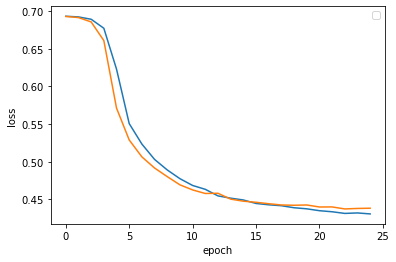

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'target')
plt.show()

# GRU
- LSTM의 라이트 버전


- LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄임


- 셀 상태(forget, input, output)을 계산하지 않고 은닉 상태(update, reset) 하나만 포함

- LSTM의 경우 forget gate, input gate, output gate 3개의 gate 사용


- GRU에서는 **reset gate, update gate** 2개의 gate만을 사용하며,



- cell state, hidden state가 합쳐져 하나의 **hidden state**로 표현


- LSTM 보다 가중치가 작으므로 계산량은 적지만 LSTM만큼 성능은 좋음


- 기본적으로 과적합을 억제하는 기능

In [33]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.GRU(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop= keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpointCB = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
earlystoppingCB = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x_train_seq, y_train, epochs=50, batch_size=64,
                    validation_data=(x_target_seq, y_target), callbacks=[checkpointCB, earlystoppingCB])

Epoch 1/50
313/313 [==============================] - 23s 60ms/step - loss: 0.6922 - accuracy: 0.5303 - val_loss: 0.6914 - val_accuracy: 0.5382
Epoch 2/50
313/313 [==============================] - 15s 47ms/step - loss: 0.6890 - accuracy: 0.5733 - val_loss: 0.6875 - val_accuracy: 0.5774
Epoch 3/50
313/313 [==============================] - 21s 67ms/step - loss: 0.6836 - accuracy: 0.6090 - val_loss: 0.6811 - val_accuracy: 0.6074
Epoch 4/50
313/313 [==============================] - 19s 61ms/step - loss: 0.6739 - accuracy: 0.6328 - val_loss: 0.6692 - val_accuracy: 0.6368
Epoch 5/50
313/313 [==============================] - 16s 53ms/step - loss: 0.6564 - accuracy: 0.6558 - val_loss: 0.6473 - val_accuracy: 0.6618
Epoch 6/50
313/313 [==============================] - 16s 51ms/step - loss: 0.6212 - accuracy: 0.6837 - val_loss: 0.5984 - val_accuracy: 0.7008
Epoch 7/50
313/313 [==============================] - 16s 53ms/step - loss: 0.5529 - accuracy: 0.7282 - val_loss: 0.5384 - val_accuracy:

In [34]:
import warnings
warnings.filterwarnings('ignore') # 경고 무시하기

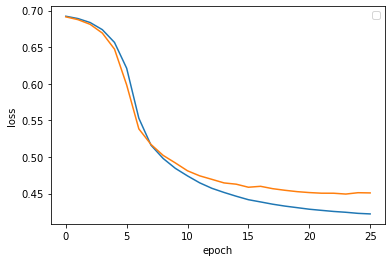

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'target')
plt.show()

In [36]:
model.evaluate(x_train_seq, y_train)

625/625 [==============================] - 7s 10ms/step - loss: 0.4215 - accuracy: 0.8138


[0.42151322960853577, 0.8138499855995178]

In [37]:
model.evaluate(x_target_seq, y_target)

157/157 [==============================] - 1s 9ms/step - loss: 0.4494 - accuracy: 0.7908


[0.44939106702804565, 0.7907999753952026]